# **Assignment 8**

# **Weeks 10 & 11 - matplotlib & seaborn**

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Mar 18 14:47:48 2023
https://data.cityofnewyork.us/City-Government/NYC-Jobs/kpav-sd4t
@author: benson
"""
'\nCreated on Sat Mar 18 14:47:48 2023\nhttps://data.cityofnewyork.us/City-Government/NYC-Jobs/kpav-sd4t\n@author: benson\n'

# Introduction

The dataset I am using is the City Government NYC Job listing from NYC DATA. Link source:(https://data.cityofnewyork.us/City-Government/NYC-Jobs/kpav-sd4t).

This data set has multiple data types that allow me to play around and practice many things in Pandas—for example, Clean Null value, changing data type, etc.

Also, it can provide meaningful information on the current job posting for someone looking to change a career in an unpredictable economy.

There are many more detailed analyses from this dataset, like, job skills, Job category in demand, and more. But I will focus on the job salary in this analysis.


# Data Exploration


In [61]:


# Import Pandas and read CSV file into Pandas Dataframe
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('NYC_Jobs.csv')
df.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,576947,DEPARTMENT OF BUILDINGS,Internal,3,Plan Examiner,PLAN EXAMINER (BLDGS),Competitive-1,22410,00,"Engineering, Architecture, & Planning",...,You must be able to understand and be understo...,For Non-City/External Candidates: Visit the Ex...,NaN,CITYWIDE Unit assignment and work location are...,NaN,New York City Residency is not required for th...,03/01/2023,31-MAR-2023,03/01/2023,03/07/2023
1,564623,OFFICE OF LABOR RELATIONS,Internal,13,Data Processor,COMMUNITY ASSISTANT,Non-Competitive-5,56056,00,Administration & Human Resources,...,PLEASE NOTE: THIS IS A TEMPORARY POSITION UNT...,TO APPLY PLEASE SUBMIT YOUR COVER LETTER AND R...,NaN,NaN,NaN,New York City residency is generally required ...,12/29/2022,NaN,03/06/2023,03/07/2023
2,533544,ADMIN FOR CHILDREN'S SVCS,External,1,"Security Consultant, Horizon",COMMUNITY COORDINATOR,Non-Competitive-5,56058,00,"Public Safety, Inspections, & Enforcement",...,Section 424-A of the New York Social Services ...,Click on the Apply button now.,NaN,NaN,NaN,New York City residency is generally required ...,08/19/2022,NaN,08/19/2022,03/07/2023
3,545994,DEPARTMENT OF TRANSPORTATION,Internal,1,Civil Engineer Level -3,CIVIL ENGINEER,Competitive-1,20215,03,"Engineering, Architecture, & Planning",...,The City of New York is an inclusive equal opp...,Resumes may be submitted electronically using ...,35 Hours,55 Water St Ny Ny,NaN,New York City Residency is not required for th...,09/27/2022,NaN,10/04/2022,03/07/2023
4,538672,HRA/DEPT OF SOCIAL SERVICES,External,1,"DIRECTOR, SNT PROGRAM",EXECUTIVE AGENCY COUNSEL,Non-Competitive-5,95005,M2,Administration & Human Resources Constituent S...,...,**LOAN FORGIVENESS The federal government pro...,Click Apply Now Button,Monday to Friday: 9 - 5.,NaN,NaN,New York City residency is generally required ...,07/15/2022,NaN,12/12/2022,03/07/2023


# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

In [62]:
# Display the data type
df.dtypes

# Modify multiple column names
rename_dict = {'# Of Positions': 'Number of Position', 'Full-Time/Part-Time indicator': 'Job Type'}
df = df.rename(columns=rename_dict)

# Convert the string to date data type
df['Posting Date'] = pd.to_datetime(df['Posting Date'])
df['Posting Updated'] = pd.to_datetime(df['Posting Updated'])
df['Process Date'] = pd.to_datetime(df['Process Date'])

# Check any Null Value and drop it in 
print(df.isna().any(axis=0))

# Check number of records
num_rows = len(df)

# Create new columns based on existing columns or calculations.
df['Average_Salary'] = (df['Salary Range From'] + df['Salary Range To'] )/2
df['Job_Category_Type'] = df['Job Category'].str.extract('(\w+)')

# Drop Unused Column
df = df.drop('Post Until', axis=1)
df = df.drop('Recruitment Contact', axis=1)
df = df.drop('Work Location 1', axis=1)
df = df.drop('Additional Information', axis=1)
df = df.drop('Hours/Shift', axis=1)

# Drop Nan Records
df = df.dropna()
num_rows_updated = len(df)

# Create new dataframe for some specific analysis (filtering and sorting)
# Only full time job with annual salary listing is used here.
job_ft_salary_df = df[(df["Job Type"]=='F') & (df["Salary Frequency"] == "Annual")] 

job_ft_salary_df = job_ft_salary_df.loc[:, ['Job_Category_Type', 'Average_Salary', 'Career Level']]
job_ft_salary_df = job_ft_salary_df.sort_values(["Job_Category_Type", "Average_Salary"],ascending =[True,True])

# Convert all the string values to upper or lower cases in one column.
job_ft_salary_df['Job_Category_Type'] = df['Job_Category_Type'].str.upper()

# Check whether numeric values are present in a given column of your dataframe.
is_numeric = pd.to_numeric(job_ft_salary_df['Average_Salary'], errors='coerce').notnull().all()

Job ID                       False
Agency                       False
Posting Type                 False
Number of Position           False
Business Title               False
Civil Service Title          False
Title Classification         False
Title Code No                False
Level                        False
Job Category                  True
Job Type                      True
Career Level                  True
Salary Range From            False
Salary Range To              False
Salary Frequency             False
Work Location                False
Division/Work Unit           False
Job Description              False
Minimum Qual Requirements     True
Preferred Skills              True
Additional Information        True
To Apply                     False
Hours/Shift                   True
Work Location 1               True
Recruitment Contact           True
Residency Requirement        False
Posting Date                 False
Post Until                    True
Posting Updated     

# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties. 

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above 


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.




Text(0, 0.5, 'Mean Value')

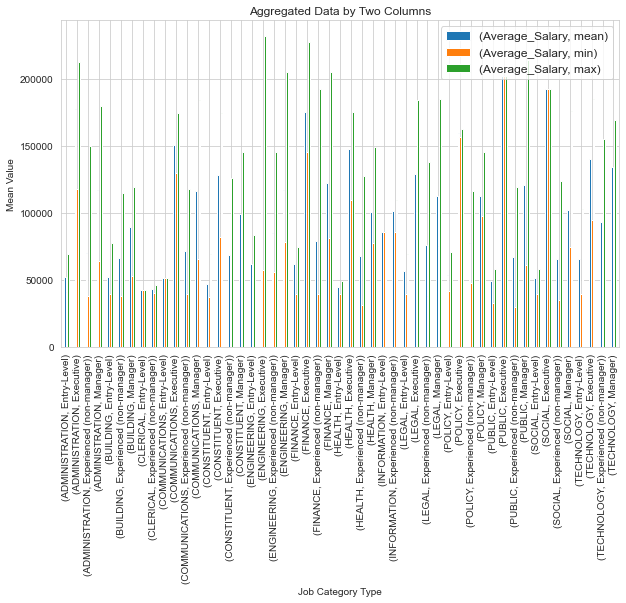

In [63]:
# Group your dataset by two columns and then sort the aggregated results within the groups.
result2 = job_ft_salary_df.groupby(['Job_Category_Type','Career Level']).agg({'Average_Salary': ['mean', 'min', 'max']})

# bar chart
result2.plot(kind='bar', figsize=(10, 6))

# Change the legend position to upper right
# Change the legend font size to 12
plt.legend(loc='upper right', fontsize=12)

# Change the title and x/y labels
plt.title('Aggregated Data by Two Columns')
plt.xlabel('Job Category Type')
plt.ylabel('Mean Value')

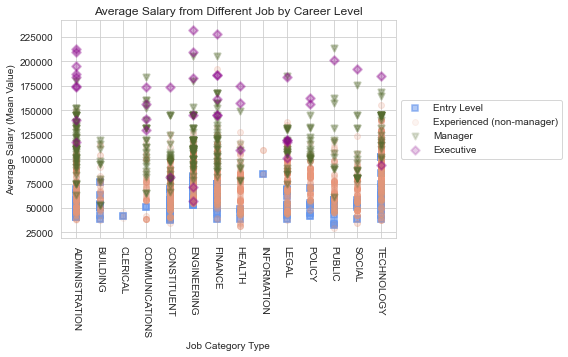

In [64]:
#Visualization Part 1 ( i need break down level of career show it in 4 different plot)
job_ft_entry_career_salary_df = job_ft_salary_df[(job_ft_salary_df["Career Level"]=="Entry-Level")] 
job_ft_non_manager_career_salary_df = job_ft_salary_df[(job_ft_salary_df["Career Level"]=="Experienced (non-manager)")] 
job_ft_entry_manager_career_salary_df = job_ft_salary_df[(job_ft_salary_df["Career Level"]=="Manager")] 
job_ft_executive_career_salary_df = job_ft_salary_df[(job_ft_salary_df["Career Level"]=="Executive")] 

# scatter chart
# Change the marker, line colors, and line width
plt.scatter(job_ft_entry_career_salary_df.Job_Category_Type ,job_ft_entry_career_salary_df.Average_Salary, label="Entry Level", alpha=0.5, marker='s', color='CornflowerBlue', linewidth=2)
plt.scatter(job_ft_non_manager_career_salary_df.Job_Category_Type ,job_ft_non_manager_career_salary_df.Average_Salary, label="Experienced (non-manager)", alpha=0.1, color='DarkSalmon')
plt.scatter(job_ft_entry_manager_career_salary_df.Job_Category_Type ,job_ft_entry_manager_career_salary_df.Average_Salary, label="Manager", alpha=0.2, marker='v', color='DarkOliveGreen', linewidth=2)
plt.scatter(job_ft_executive_career_salary_df.Job_Category_Type ,job_ft_executive_career_salary_df.Average_Salary, label="Executive", alpha=0.2, marker='D', color='DarkMagenta', linewidth=2)

# Place legend to outside of the plot)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# rotate the xaxis label
plt.xticks(rotation=270)

# Change the title and x/y labels
plt.title('Average Salary from Different Job by Career Level')
plt.xlabel('Job Category Type')
plt.ylabel('Average Salary (Mean Value)')

# Display the plot
plt.show()

### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  

**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.


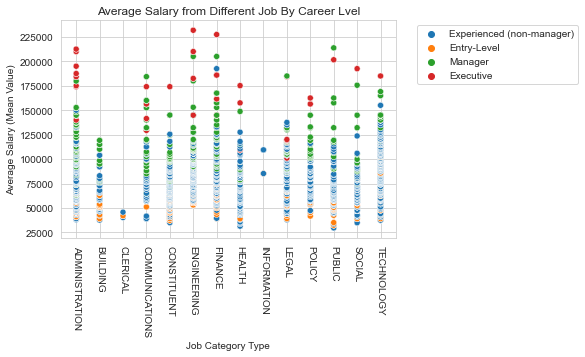

In [65]:
import seaborn as sns

sns.set_style("whitegrid")

# Create a bar chart with hue
ax = sns.scatterplot(x='Job_Category_Type', y='Average_Salary', hue='Career Level', data=job_ft_salary_df)
ax.tick_params(axis='x', rotation=270)
ax.set_title('Average Salary from Different Job By Career Lvel')
ax.set_xlabel('Job Category Type')
ax.set_ylabel('Average Salary (Mean Value)')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

Text(0, 0.5, 'Average Salary (Mean Value)')

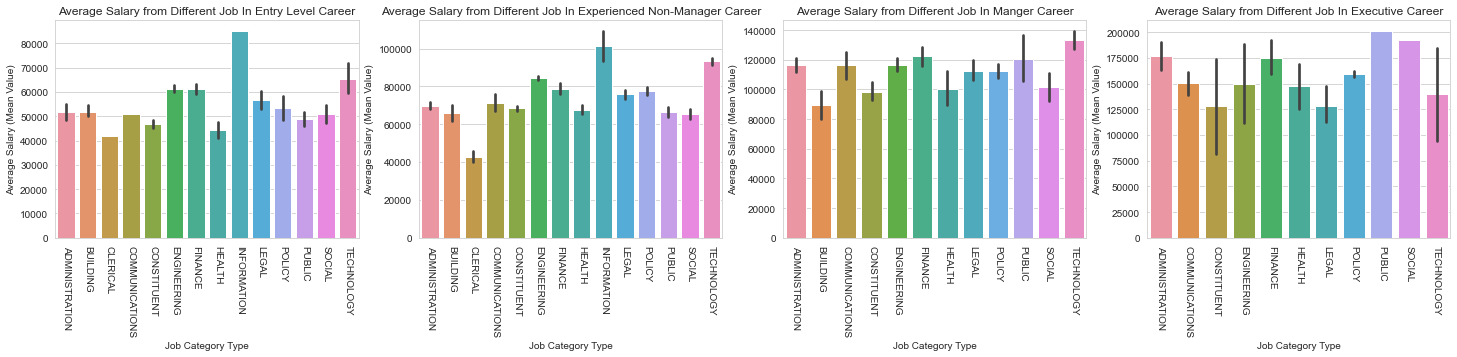

In [66]:

# Create a bar chart with Seaborn
sns.set_style("whitegrid")

# Create a figure with 3 subplots and set the figures size
fig, axs = plt.subplots(ncols=4, figsize=(25, 4))

sns.barplot(x='Job_Category_Type', y='Average_Salary', data=job_ft_entry_career_salary_df, ax=axs[0])
# Set the chart title and axis labels
axs[0].tick_params(axis='x', rotation=270)
axs[0].set_title('Average Salary from Different Job In Entry Level Career')
axs[0].set_xlabel('Job Category Type')
axs[0].set_ylabel('Average Salary (Mean Value)')

sns.barplot(x='Job_Category_Type', y='Average_Salary', data=job_ft_non_manager_career_salary_df, ax=axs[1])
# Set the chart title and axis labels
axs[1].tick_params(axis='x', rotation=270)
axs[1].set_title('Average Salary from Different Job In Experienced Non-Manager Career')
axs[1].set_xlabel('Job Category Type')
axs[1].set_ylabel('Average Salary (Mean Value)')

sns.barplot(x='Job_Category_Type', y='Average_Salary', data=job_ft_entry_manager_career_salary_df, ax=axs[2])
# Set the chart title and axis labels
axs[2].tick_params(axis='x', rotation=270)
axs[2].set_title('Average Salary from Different Job In Manger Career')
axs[2].set_xlabel('Job Category Type')
axs[2].set_ylabel('Average Salary (Mean Value)')

sns.barplot(x='Job_Category_Type', y='Average_Salary', data=job_ft_executive_career_salary_df, ax=axs[3])
# Set the chart title and axis labels
axs[3].tick_params(axis='x', rotation=270)
axs[3].set_title('Average Salary from Different Job In Executive Career')
axs[3].set_xlabel('Job Category Type')
axs[3].set_ylabel('Average Salary (Mean Value)')





### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.

Based on my plots, Seaborn default styles is much clean and more colorful. It looks more attractive than Matplotlib.


# Conclusions  


I was missing the career level "Executive" in the last data exploration. And I can easily see it when I display it in the seaborn scatterplot legend. It is an excellent example to show seaborn is much easier to create complex visualization. 
With a more detailed breakdown from the career level, I noticed the job in "Information" gives an outstanding salary to the entry and experienced non-manager career level. It perfectly shows the demand in the market as Technology is booming era.   